In [376]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

In [377]:
class ArtificialNeuron:
    def __init__(self, n_independent, learning_rate = 0.1):
        # Iniciar w como un array de ceros.
        self.w = np.zeros(n_independent)
        # Iniciar valor de b
        self.b = 0
        # Guardar factor de aprendizaje en eta
        self.eta = learning_rate
    
    def predict(self, x):
        # Hacer la predicción de y con w*x + b
        y_est = np.dot(self.w, x) + self.b
        return y_est
    
    def train(self, X, Y, epochs=50):
        p = X.shape[1] # tamaño del dataset
        for _ in range(epochs):
            for i in range(p):
                # Obtener la i-ésima observación de x
                x = X[:, i]
                # Predecir
                y_est = self.predict(x)
                # Calcular error
                error = Y[:, i] - y_est
                # w = w + eta * (y - y_pred) * x
                self.w += self.eta * error * x
                # b = b + eta * (y - y_pred)
                self.b += self.eta * error
    
    def get_params(self):
        return (self.w, self.b)

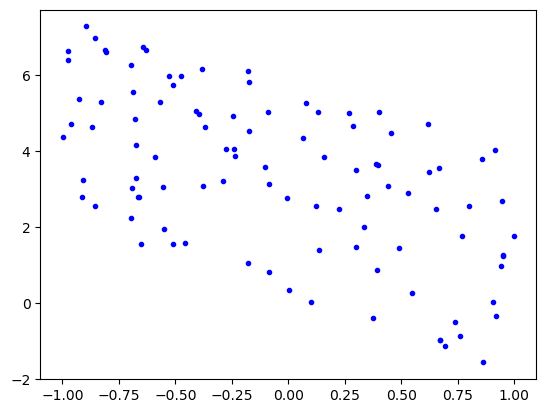

In [378]:
# Genero 100 datos aleatorios, con tendencia lineal
p=100
x = -1 + 2 * np.random.rand(p).reshape(1,-1)
y = -2 * x + 6 * np.random.rand(p)
plt.plot(x,y,'.b')
plt.show()

In [379]:
# Entreno el modelo
epochs = 500
neuron = ArtificialNeuron(n_independent=1, learning_rate=0.0001)
neuron.train(x,y, epochs=epochs)

In [380]:
# Ver resultados del modelo
w, b = neuron.get_params()
print(f"y_est = {b[0]:.4f} + {w[0]:.4f} * x")

y_est = 3.2212 + -1.7826 * x


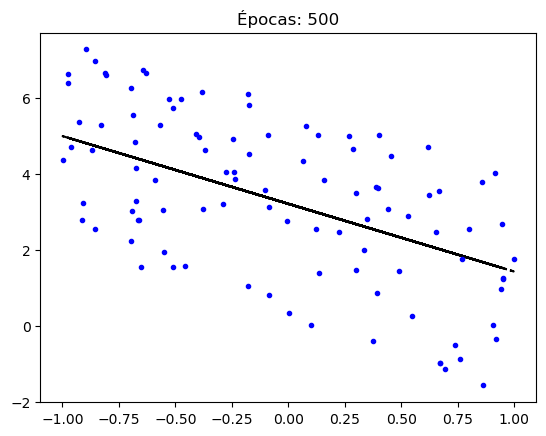

In [381]:
# Mostrar resultados
y_pred_array = []
for num in x[0]:
    y_pred_array.append(neuron.predict([num]))
plt.title("Épocas: " + str(epochs))
plt.plot(x[0], y_pred_array, '--k')
plt.plot(x,y,'.b')
plt.show()

# Ahora comprobar con dataset de costo de viviendas

In [382]:
df_housing = pd.read_csv('boston_house_prices.csv')
df_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


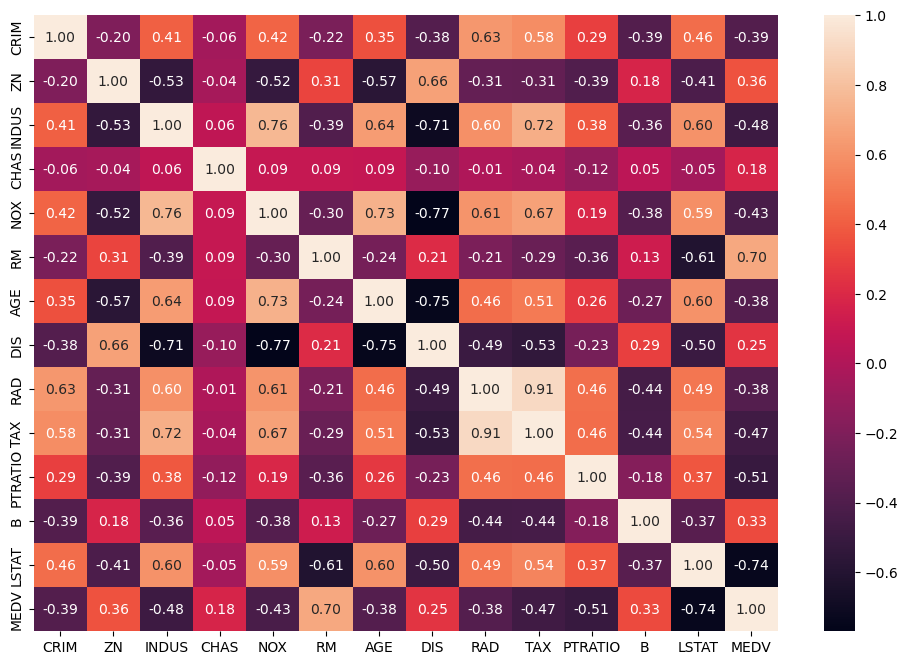

In [383]:
plt.figure(figsize=(12,8))
sns.heatmap(df_housing.corr(), annot=True, fmt=".2f")
plt.show()

La variable objetivo es MEDV (Valor medio de la propiedad.)

Veo que la variable RM tiene una gran correlación positiva, voy a usarla
para entrenar el modelo de adaline

In [384]:
# Voy a hacer una regresión lineal con el valor de RM (número de cuartos)
# y MEDV (Valor de la propiedad)
X = pd.DataFrame(df_housing[['RM']])
y = df_housing['MEDV']

In [385]:
# Separar datos de entrenamiento y de pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3, shuffle=True
)

X_train

,RM
5,6.430
116,6.176
45,5.682
16,5.935
468,5.926
...,...
106,5.836
270,5.856
348,6.635
435,6.629


In [ ]:
# Usar SGDRegressor con la función de costo squared_error para modelar adaline
adaline = SGDRegressor(loss='squared_error', max_iter=100, eta0=0.1)
adaline.fit(X_train, y_train)

SGDRegressor(eta0=0.1, max_iter=100)

In [392]:
# Predecir
y_pred = adaline.predict(X_test)

In [393]:
# Obtener evaluaciones para regresión

mae = metrics.mean_absolute_error(y_test, y_pred)
msq = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"MSE: {msq:.2f}")
print(f"R2: {r2:.2f}")

MAE: 4.38
MSE: 42.31
R2: 0.43


In [394]:
# Ver resultados del modelo
b = adaline.intercept_[0]
w1 = adaline.coef_[0]
print(f"MEDV = {b:-4f} + {w1:.4f} * RM")

MEDV = -44.669950 + 10.8083 * RM


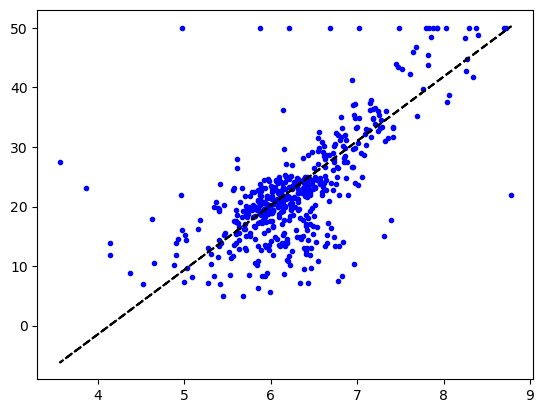

In [395]:
y_pred_all = adaline.predict(X)
plt.plot(X,y,'.b')
plt.plot(X, y_pred_all, '--k')
plt.show()